In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Guro_Gu_Only.csv")

In [3]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [4]:
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A15288812,1153010100,853,20030517.0,개별난방,아파트,단일계약,19.0,42.0,1442.0
1,A15288806,1153010100,408,19921204.0,개별난방,아파트,단일계약,14.0,159.0,93.0
2,A15288802,1153010100,204,20010920.0,개별난방,아파트,종합계약,5.0,34.0,226.0
3,A15288805,1153010100,362,20030816.0,개별난방,아파트,단일계약,10.0,37.0,374.0
4,A15288813,1153010100,1095,19991130.0,개별난방,아파트,단일계약,22.0,152.0,1359.0
...,...,...,...,...,...,...,...,...,...,...
127,A10024849,1153011200,337,20200603.0,지역난방,아파트,종합계약,9.0,0.0,500.0
128,A10024927,1153011200,345,20200227.0,지역난방,아파트,종합계약,13.0,67.0,386.0
129,A10025115,1153011200,419,20191206.0,지역난방,아파트,종합계약,14.0,12.0,649.0
130,A10025193,1153011200,634,20190927.0,지역난방,아파트,단일계약,52.0,7.0,816.0


In [5]:
df.isnull().sum()

kaptCode          0
bjdCode           0
Household_Num     0
Begin_Date        0
Heating_Method    0
House_Type        0
Elec_Con          2
Elev_Num          4
Park_Above        2
Park_Below        2
dtype: int64

<AxesSubplot: >

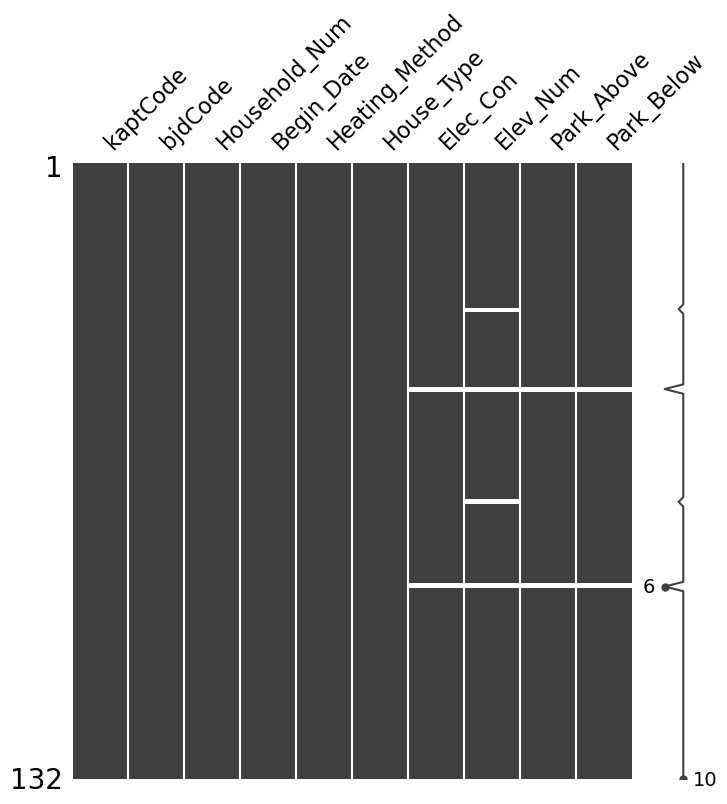

In [6]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [7]:
#null values
Begin_Date = df['Begin_Date']
print(f"There are {Begin_Date.isnull().sum()} null values, and they are located at \n{np.where(Begin_Date.isnull())[0]}")

There are 0 null values, and they are located at 
[]


In [8]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0     2003-05-17
1     1992-12-04
2     2001-09-20
3     2003-08-16
4     1999-11-30
         ...    
127   2020-06-03
128   2020-02-27
129   2019-12-06
130   2019-09-27
131   2019-05-31
Name: Begin_Date, Length: 132, dtype: datetime64[ns]


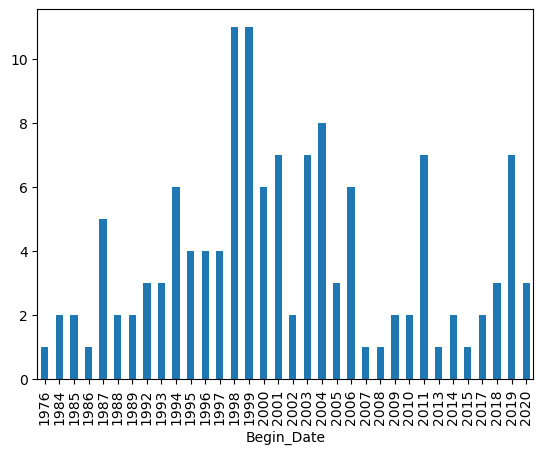

In [9]:
# distribution of years in Begin_Date
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

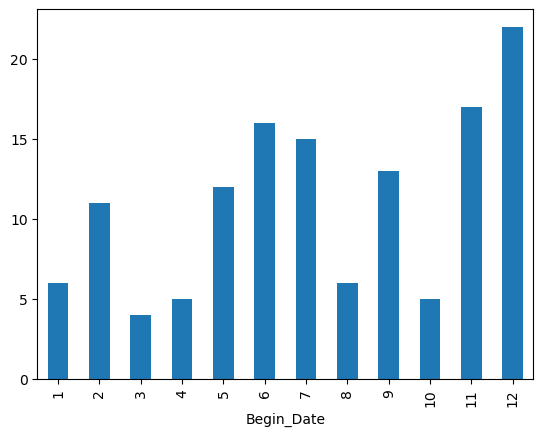

In [10]:
#Distribtion of months in Begin_Date(just for fun)
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [11]:
#1 null value
Household_Num = df['Household_Num']
print(f"There are {Household_Num.isnull().sum()} null values, and they are located at \n{np.where(Household_Num.isnull())[0]}")
display(Household_Num)

There are 0 null values, and they are located at 
[]


0       853
1       408
2       204
3       362
4      1095
       ... 
127     337
128     345
129     419
130     634
131     297
Name: Household_Num, Length: 132, dtype: int64

In [12]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

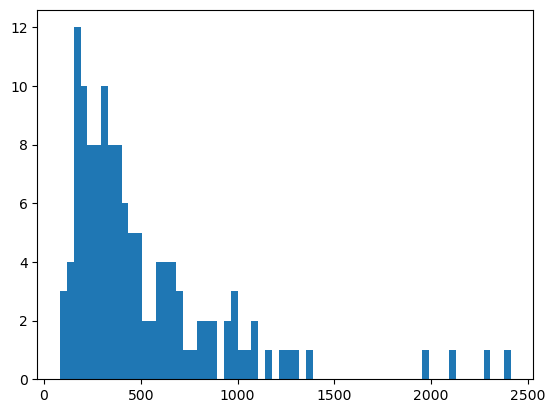

In [13]:
fig, ax = plt.subplots()
b = int(len(Household_Num)/2)
ax.hist(Household_Num, bins = b)
plt.show()

In [14]:
Household_Num.describe()

count     132.000000
mean      513.871212
std       420.202885
min        83.000000
25%       246.500000
50%       376.000000
75%       648.250000
max      2412.000000
Name: Household_Num, dtype: float64

In [15]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [16]:
printApt(Household_Num, df, dfInfo)

kaptCode           A15209207
bjdCode           1153010700
Household_Num           2412
Begin_Date        20010822.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                55.0
Park_Above             208.0
Park_Below            2860.0
Name: 77, dtype: object
     kaptCode Complex_Name
90  A15209207     개봉동현대아파트


## Heating_Method

In [17]:
# null values
Heating_Method = df['Heating_Method']
print(f"There are {Heating_Method.isnull().sum()} null values, and they are located at \n{np.where(Heating_Method.isnull())[0]}")
display(Heating_Method)

There are 0 null values, and they are located at 
[]


0      개별난방
1      개별난방
2      개별난방
3      개별난방
4      개별난방
       ... 
127    지역난방
128    지역난방
129    지역난방
130    지역난방
131    지역난방
Name: Heating_Method, Length: 132, dtype: object

In [18]:
Heating_Method = Heating_Method.dropna()

In [19]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 1 0 2 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2]
Index(['개별난방', '중앙난방', '지역난방'], dtype='object')


In [20]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    111
2     14
1      7
dtype: int64

In [21]:
eng_ind_HM = ['Individual','Central', 'Regional']

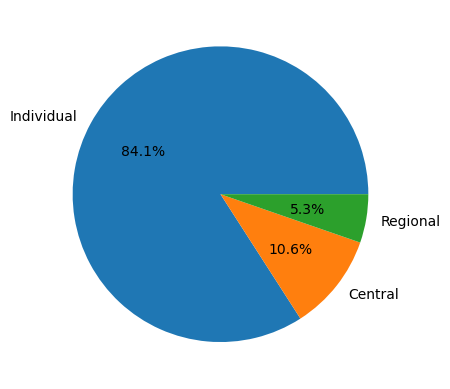

In [22]:
fig, ax = plt.subplots()
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [23]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 4 null values, and they are located at 
[31 48 72 90]


In [24]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

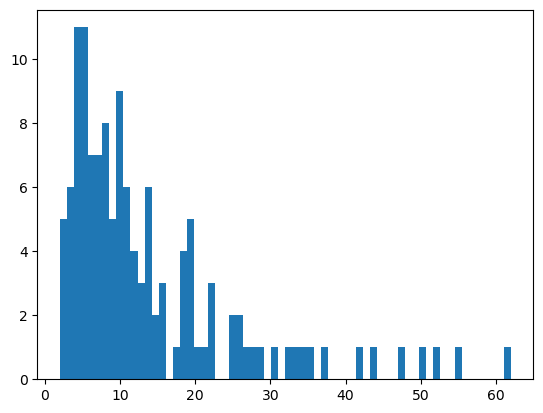

In [25]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [26]:
Elev_Num.describe()

count    128.000000
mean      13.773438
std       12.004733
min        2.000000
25%        5.000000
50%       10.000000
75%       18.000000
max       62.000000
Name: Elev_Num, dtype: float64

In [27]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A15210211
bjdCode           1153010800
Household_Num            620
Begin_Date        20030913.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                62.0
Park_Above               0.0
Park_Below             630.0
Name: 100, dtype: object
      kaptCode Complex_Name
114  A15210211      오류금강수목원


## Electricity Contract; Elec_Con

In [28]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 2 null values, and they are located at 
[48 90]


In [29]:
Elec_Con = Elec_Con.dropna()

In [30]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 2 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0]
Index(['단일계약', '종합계약', '기타'], dtype='object')


In [31]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

0    98
1    30
2     2
dtype: int64

In [33]:
eng_ind_EC = ['Single', 'Comprehensive', 'Other']

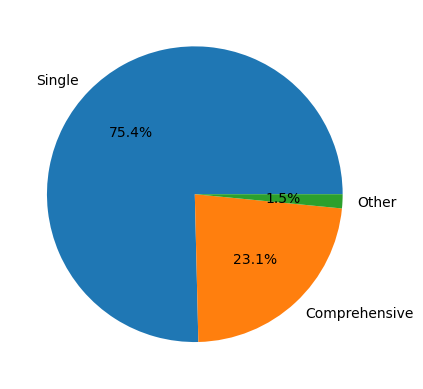

In [34]:
fig, ax = plt.subplots()
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [35]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 2 null values, and they are located at 
[48 90]
There are 2 null values, and they are located at 
[48 90]


In [36]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0       42
1      159
2       34
3       37
4      152
      ... 
127      0
128     67
129     12
130      7
131      0
Name: Park_Above, Length: 130, dtype: int16

0      1442
1        93
2       226
3       374
4      1359
       ... 
127     500
128     386
129     649
130     816
131     310
Name: Park_Below, Length: 130, dtype: int16

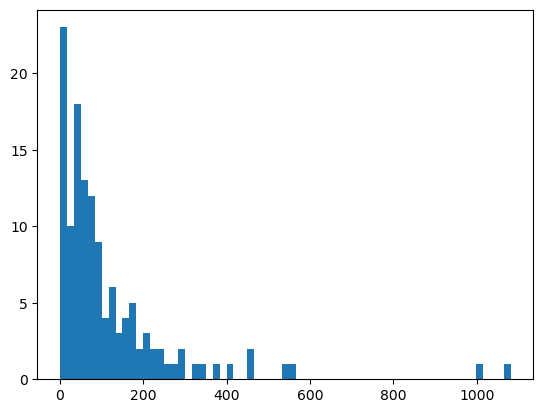

In [37]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

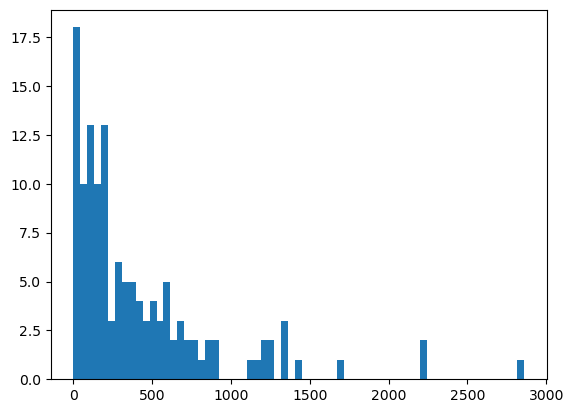

In [38]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = b)
plt.show()

In [39]:
Park_Above.describe()

count     130.000000
mean      116.915385
std       160.543603
min         0.000000
25%        31.000000
50%        67.000000
75%       147.000000
max      1082.000000
Name: Park_Above, dtype: float64

In [40]:
Park_Below.describe()

count     130.000000
mean      417.184615
std       487.659428
min         0.000000
25%       100.250000
50%       242.000000
75%       570.500000
max      2860.000000
Name: Park_Below, dtype: float64

In [41]:
printApt(Park_Above, df, dfInfo)

kaptCode           A15286809
bjdCode           1153010200
Household_Num           2126
Begin_Date        19860630.0
Heating_Method          중앙난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                34.0
Park_Above            1082.0
Park_Below               0.0
Name: 21, dtype: object
     kaptCode Complex_Name
23  A15286809         구로주공


In [42]:
printApt(Park_Below, df, dfInfo)

kaptCode           A15209207
bjdCode           1153010700
Household_Num           2412
Begin_Date        20010822.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                55.0
Park_Above             208.0
Park_Below            2860.0
Name: 77, dtype: object
     kaptCode Complex_Name
90  A15209207     개봉동현대아파트
